In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# this is the important import line
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

# this magic allows for some interaction within the notebook.
#%matplotlib notebook
%matplotlib inline

# 3d points/scatter

In [2]:
import astropy

from astropy.io import fits
from astropy.table import Table

In [3]:
# data from SDSS on 1.8 million stars
with fits.open('../data/ssppOut-dr12.fits') as data:
    df = pd.DataFrame(data[1].data)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843200 entries, 0 to 1843199
Columns: 239 entries, SPECOBJID to FEH_CAIIK1_IRFM_UNC
dtypes: float32(147), float64(6), int16(48), int32(15), int64(2), object(21)
memory usage: 1.7+ GB


In [6]:
cols = ['DIST_AGB', 'DIST_FHB', 'SPECTYPE_SUBCLASS', 'L', 'B', 'G_MAG', 'V_MAG', 'BV', 'GR', 'UG']
subset = pd.DataFrame(df, columns=cols)
subset.replace(-9999.0, np.nan, inplace=True)
trimmed = subset.dropna()
trimmed.describe()

,DIST_AGB,DIST_FHB,L,B,G_MAG,V_MAG,BV,GR,UG
count,433804.000000,433804.000000,433804.000000,433804.000000,433804.000000,433804.000000,433804.000000,433804.000000,433804.000000
mean,25.138338,24.302139,147.100983,16.702367,17.495481,17.198492,0.609007,0.466461,1.267465
std,22.833091,15.894422,77.119170,45.099653,1.428829,1.446487,0.276894,0.378565,0.546105
min,0.101103,0.147225,0.001435,-81.421239,4.400659,6.784079,-0.725186,-8.363613,-7.795343
25%,11.331603,13.277159,83.038103,-27.847420,16.611804,16.341472,0.450343,0.287354,0.941582
50%,20.397671,21.537177,149.842471,30.870956,17.666486,17.368093,0.609217,0.461050,1.149103
75%,32.487185,32.322714,196.677621,53.902947,18.477768,18.207234,0.722835,0.585416,1.466663
max,996.277161,772.593201,359.999005,89.817496,29.345987,24.902540,1.996960,9.680391,9.780191


In [31]:
# L and B are galactic latitude and longitude. If we use one of the distances, we have a spherical coordinate system
trimmed['x'] = trimmed['DIST_FHB']*np.sin(np.rad2deg(trimmed['B']))*np.cos(np.rad2deg(trimmed['L']))
trimmed['y'] = trimmed['DIST_FHB']*np.sin(np.rad2deg(trimmed['B']))*np.sin(np.rad2deg(trimmed['L']))
trimmed['z'] = trimmed['DIST_FHB']*np.cos(np.rad2deg(trimmed['B']))

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<IPython.core.display.Javascript object>


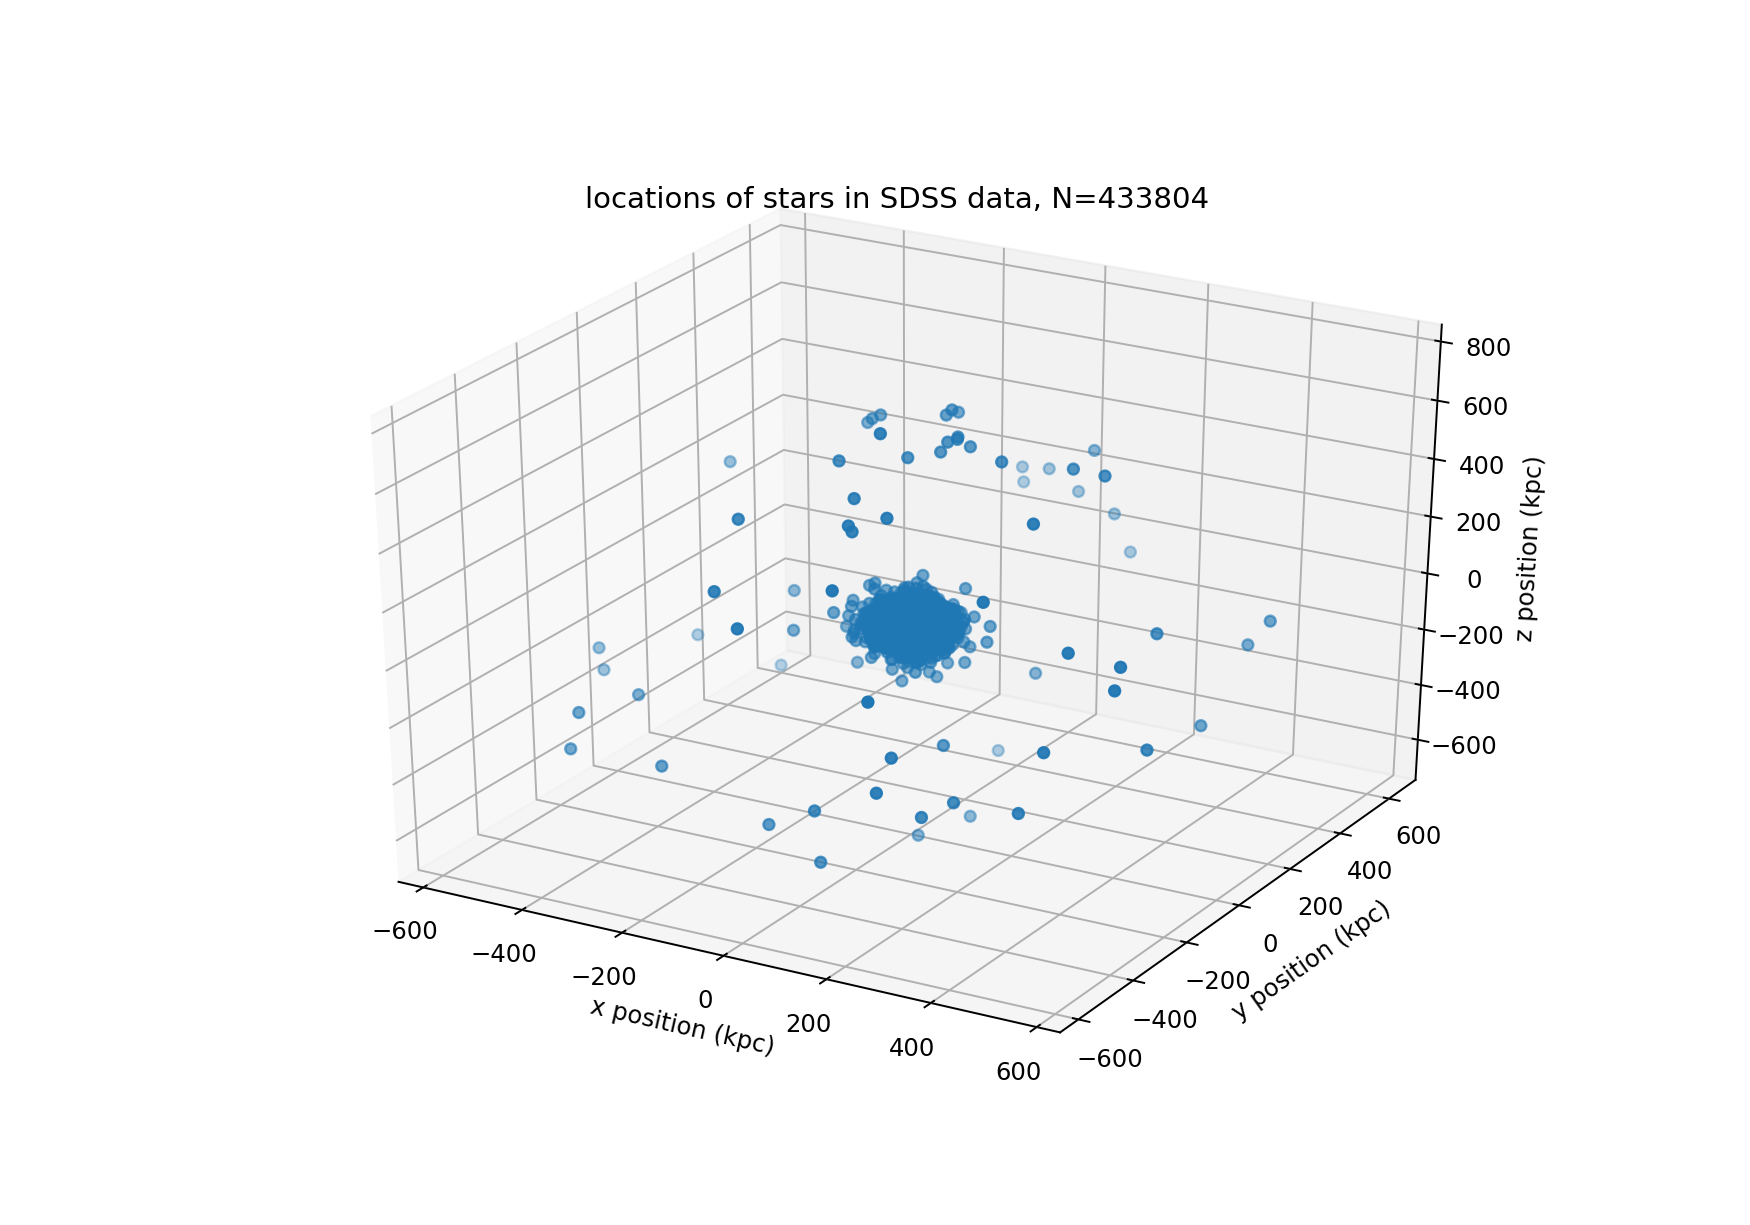

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
ax.scatter(trimmed['x'], trimmed['y'], trimmed['z'])
ax.set_title('locations of stars in SDSS data, N={}'.format(len(trimmed)))
ax.set_ylabel('y position (kpc)')
ax.set_xlabel('x position (kpc)')
ax.set_zlabel('z position (kpc)');

<IPython.core.display.Javascript object>


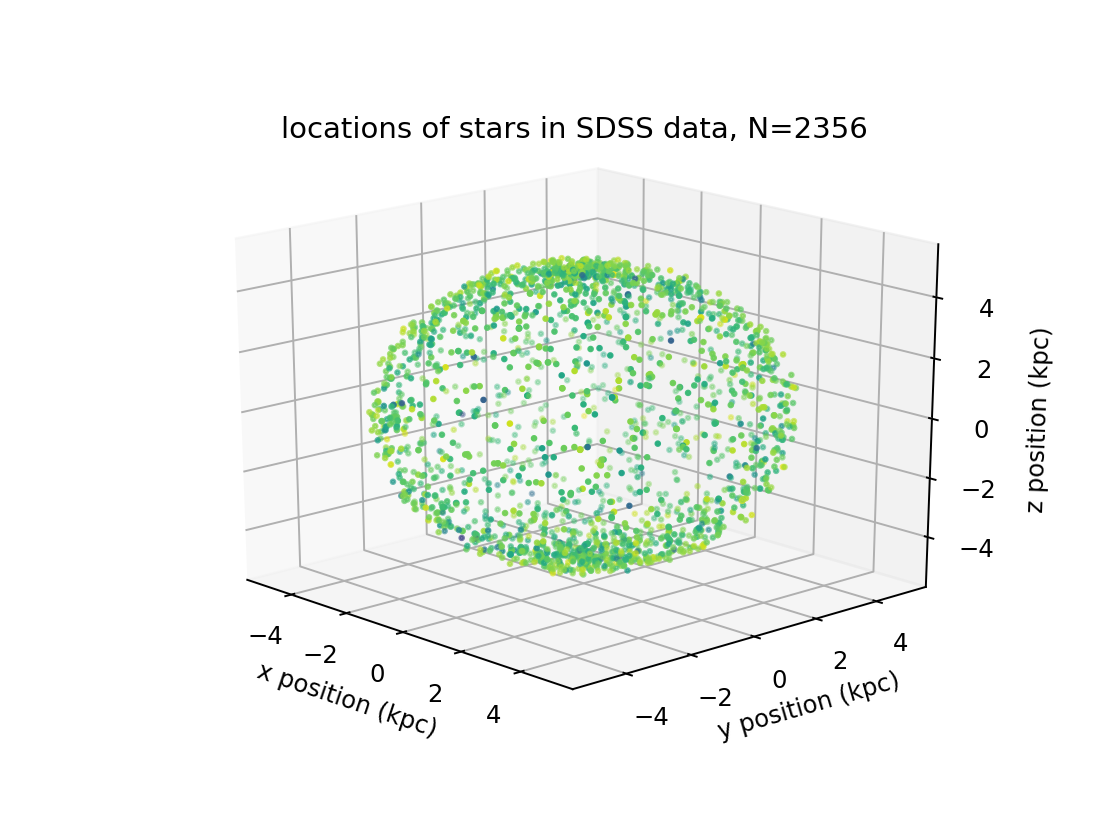

In [34]:
selector = (trimmed['DIST_FHB'] < 5) & (trimmed['DIST_FHB'] > 4.5)

fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.scatter(trimmed[selector]['x'], trimmed[selector]['y'], trimmed[selector]['z'],
           s=trimmed[selector]['G_MAG']/5, c=trimmed[selector]['V_MAG'])
ax.set_title('locations of stars in SDSS data, N={}'.format(len(trimmed[selector])))
ax.set_ylabel('y position (kpc)')
ax.set_xlabel('x position (kpc)')
ax.set_zlabel('z position (kpc)');

# 3d trajectories


<IPython.core.display.Javascript object>


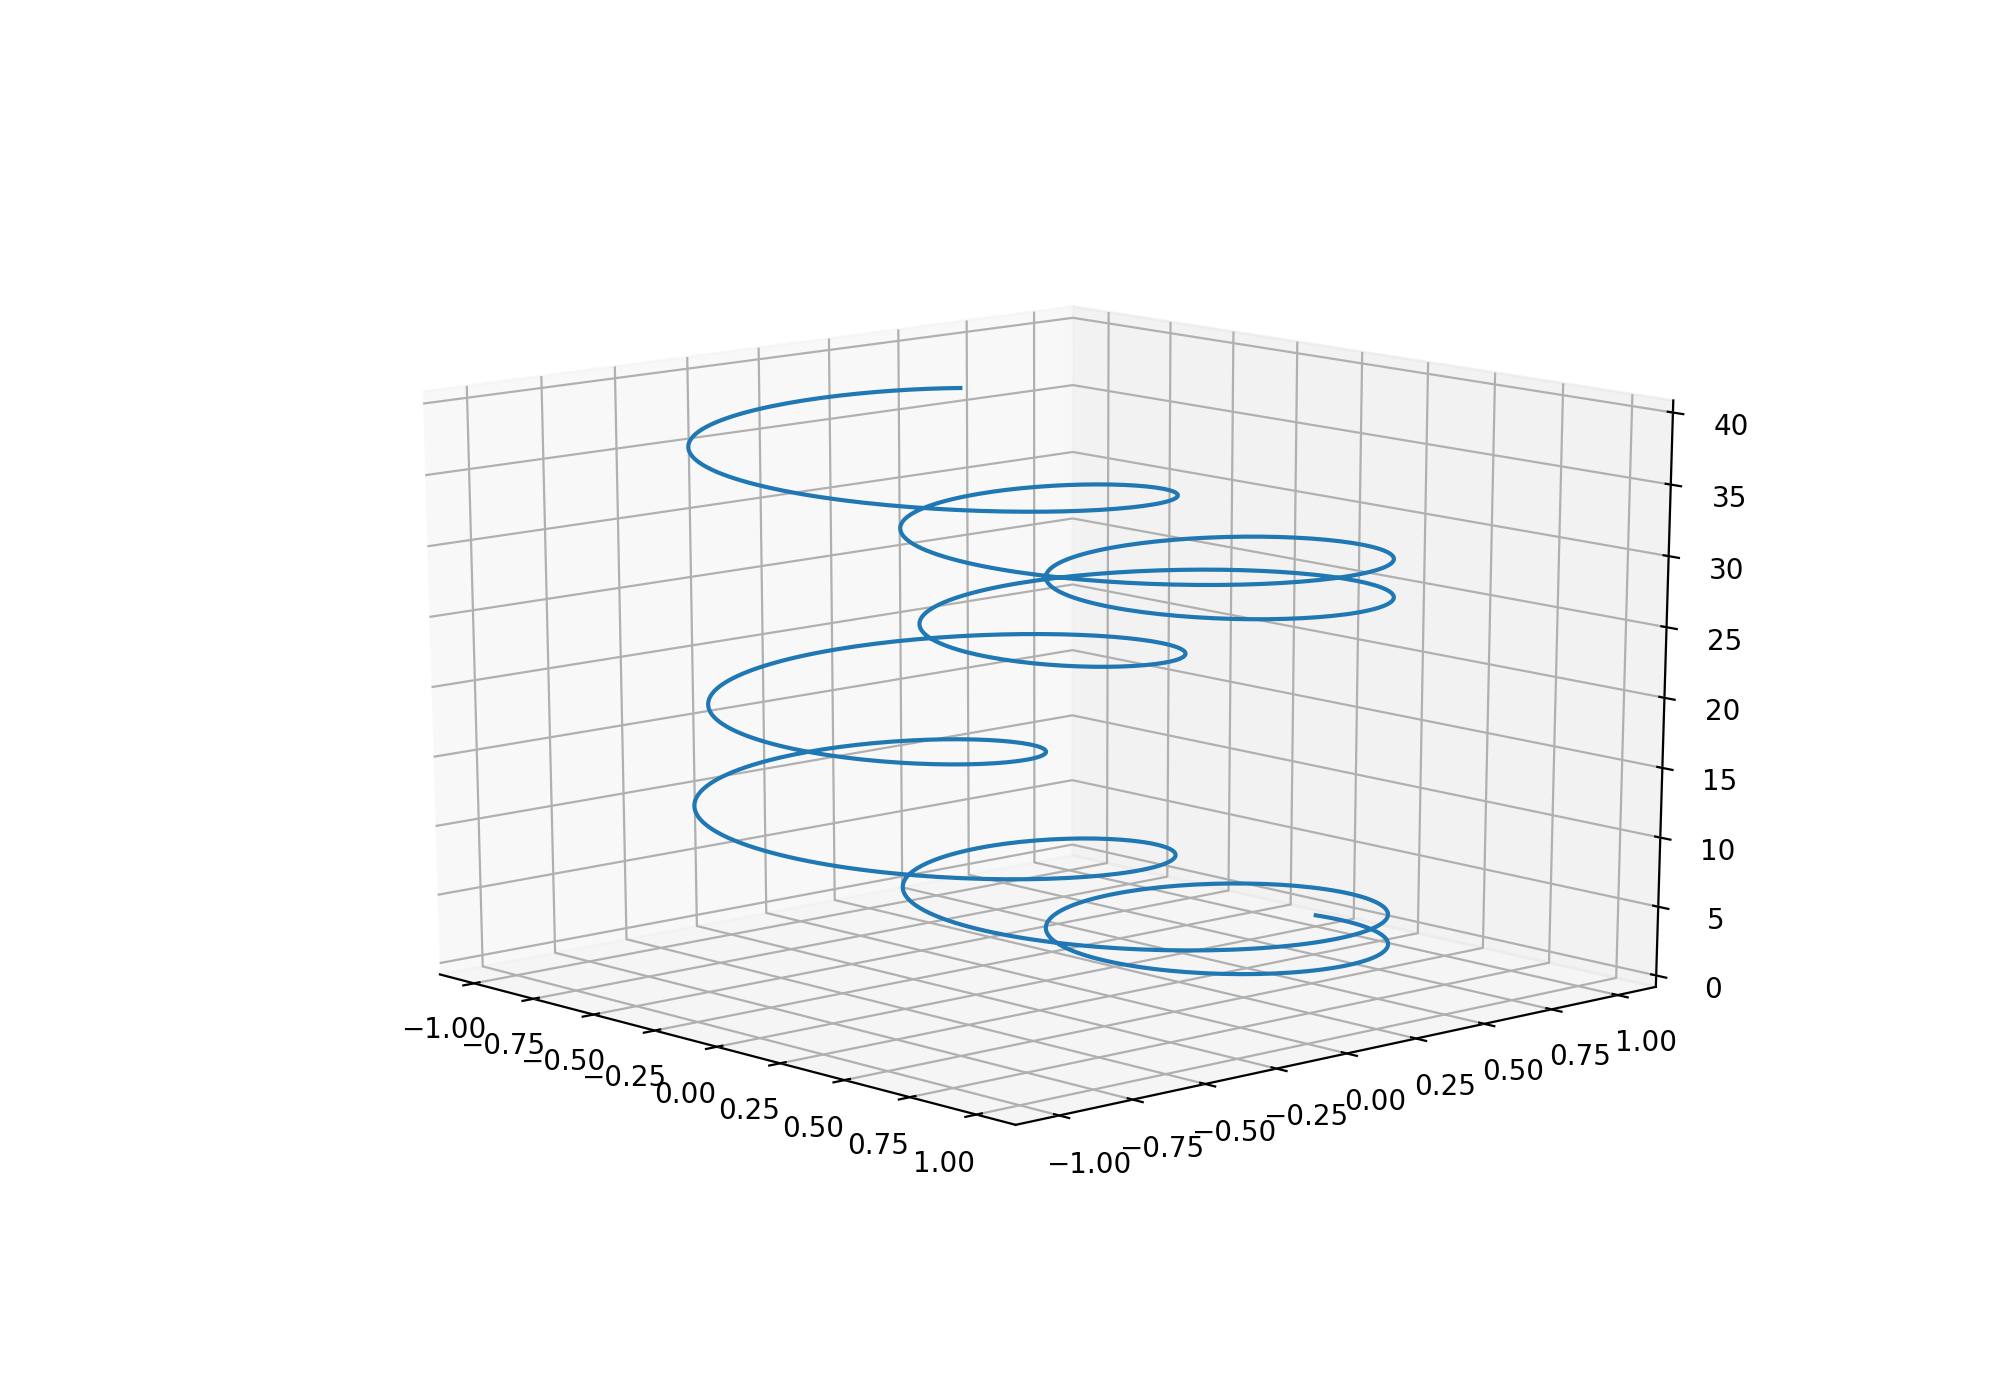

In [28]:
t = np.linspace(0,10,1000)
x = np.cos(2*t)*np.sin(3*t)
y = np.cos(2*t)*np.cos(3*t)
z = 4*t

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot('111', projection='3d')
ax.plot(x,y,z)

# Surface Plots

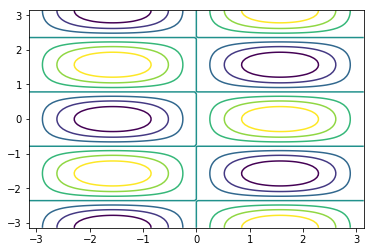

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)

xx, yy = np.meshgrid(x,y)
func = np.sin(xx)*np.cos(2*yy)

plt.contour(xx,yy, func)
plt.show()

<IPython.core.display.Javascript object>


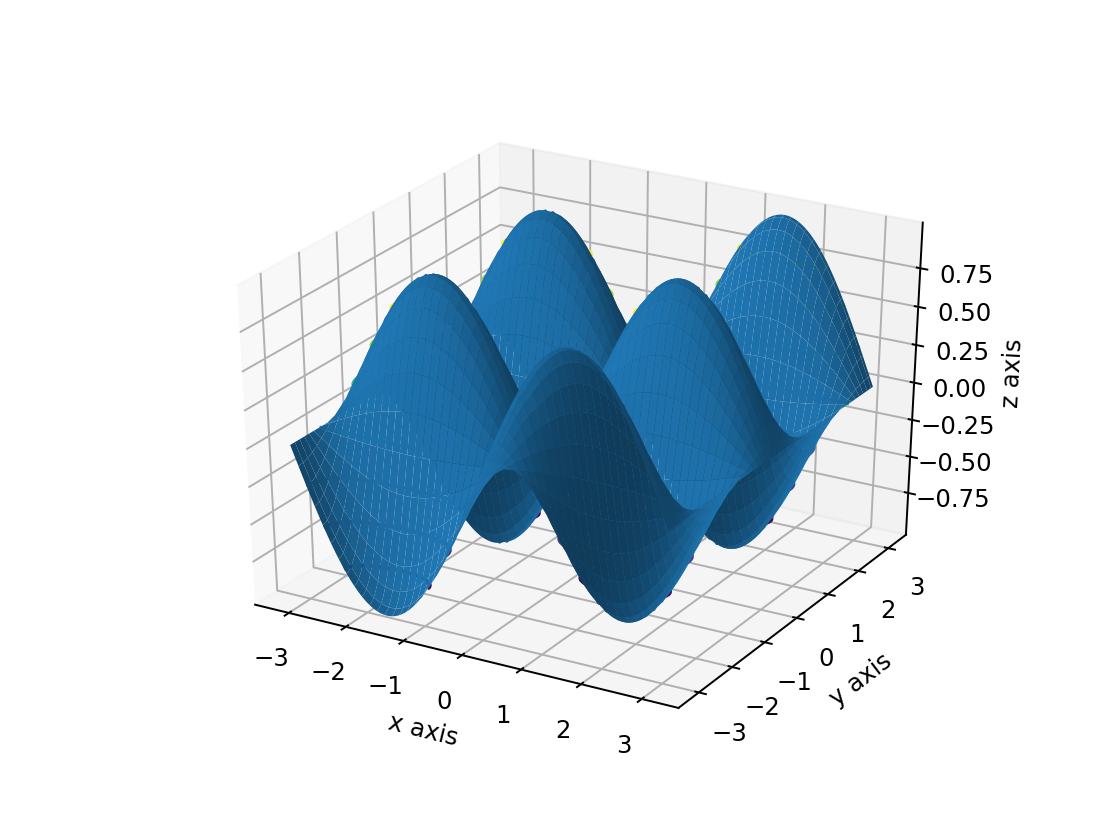

Text(0.5,0,'z axis')

In [42]:
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')

ax.plot_surface(xx,yy,func)
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

#ax.view_init(40,40)